In [1]:
import numpy as np
import matplotlib.pyplot as plt

### <center> Onda direta </center>
    
$$t = \frac{x}{v} $$

In [2]:
def tempo_onda_direta(x,v):
    # x - é um array que indica a posição dos receptores
    # v - velocidade da primeira camada
    return x/v

In [3]:
x = np.arange(0,310,10)
y = np.arange(0,50,0.1)

xi,yi = np.meshgrid(x,y)

In [4]:
zi = np.zeros(shape=(np.shape(xi)))

zi[yi<=20] = 2000
zi[(yi>=20) & (yi<=35)] = 3000
zi[yi>=35] =4000

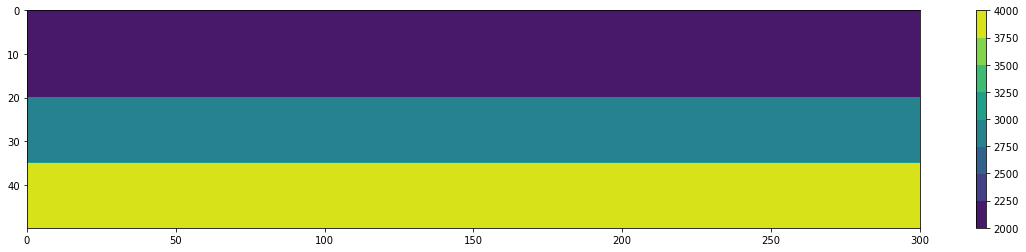

In [5]:
plt.figure(figsize=(20,4))
plt.gca().invert_yaxis()
plt.contourf(xi,yi,zi)
plt.colorbar()

In [6]:
x = np.arange(10,310,10) #arranjo programado de 10 em 10m
v = 2000
t_direta = tempo_onda_direta(x,v)
print(t_direta)

[0.005 0.01  0.015 0.02  0.025 0.03  0.035 0.04  0.045 0.05  0.055 0.06
 0.065 0.07  0.075 0.08  0.085 0.09  0.095 0.1   0.105 0.11  0.115 0.12
 0.125 0.13  0.135 0.14  0.145 0.15 ]


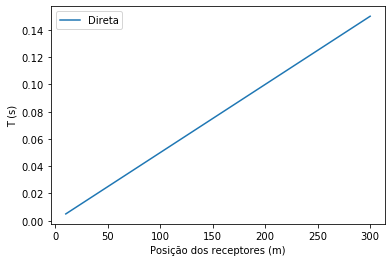

In [7]:
plt.plot(x,t_direta,label='Direta')
plt.xlabel('Posição dos receptores (m)')
plt.ylabel('T (s)')
plt.legend()

### <center> Onda refratada </center>

#### Exemplo de duas camadas

$$ t = \frac{x}{v_2}+\frac{2zcos(\theta)}{v_1} $$

In [8]:
def tempo_onda_refratada_simples(x,v,z):
    t = np.zeros(len(x)) ; theta = np.arcsin(v[0]/v[1])
    for i in range(0,len(x)):
        if x[i]>(z/np.tan(theta)):
            t[i] = (x[i]/v[1])+(2*z*np.cos(theta)/v[0])
    return t

In [9]:
x = np.arange(10,310,10) #arranjo programado de 10 em 10m
v = [2000,3000]
z=20
t_refratada_1_camada = tempo_onda_refratada_simples(x,v,z)
print(t_refratada_1_camada)

[0.         0.         0.02490712 0.02824045 0.03157379 0.03490712
 0.03824045 0.04157379 0.04490712 0.04824045 0.05157379 0.05490712
 0.05824045 0.06157379 0.06490712 0.06824045 0.07157379 0.07490712
 0.07824045 0.08157379 0.08490712 0.08824045 0.09157379 0.09490712
 0.09824045 0.10157379 0.10490712 0.10824045 0.11157379 0.11490712]


In [10]:
t_refratada_1_camada[t_refratada_1_camada>0]

array([0.02490712, 0.02824045, 0.03157379, 0.03490712, 0.03824045,
       0.04157379, 0.04490712, 0.04824045, 0.05157379, 0.05490712,
       0.05824045, 0.06157379, 0.06490712, 0.06824045, 0.07157379,
       0.07490712, 0.07824045, 0.08157379, 0.08490712, 0.08824045,
       0.09157379, 0.09490712, 0.09824045, 0.10157379, 0.10490712,
       0.10824045, 0.11157379, 0.11490712])

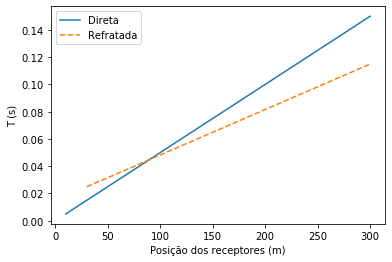

In [11]:
plt.plot(x,t_direta,label='Direta')
plt.plot(x[t_refratada_1_camada>0],t_refratada_1_camada[t_refratada_1_camada>0],label='Refratada',ls='--')
plt.xlabel('Posição dos receptores (m)')
plt.ylabel('T (s)')
plt.legend()

#### Para estimar a velocidade da camada 1 basta calcular o coeficiente de inclinação da reta:

$$a_{direta} = \frac{1}{v_1}$$

In [12]:
print('Tempo de trânsito refletor 5: %f segundos e refletor 10: %f segundos \n' %(t_direta[4],t_direta[9]))
print('Posição do receptor 5: %i metros e posição do receptor 10: %i metros' %(x[4],x[9]))

Tempo de trânsito refletor 5: 0.025000 segundos e refletor 10: 0.050000 segundos 

Posição do receptor 5: 50 metros e posição do receptor 10: 100 metros


#### <center> coeficiente de inclinação da reta </center>
    
$$ \alpha = \frac{y_1 - y_0}{x_1 - x_0}$$

In [13]:
alpha_direta = (t_direta[9]-t_direta[4])/(x[9]-x[4])
print(alpha_direta)

0.0005


$$\alpha = \frac{1}{v_1}$$

In [14]:
vel_camada_1 = 1/alpha_direta
print(vel_camada_1)

2000.0


#### O mesmo é feito para calcular a velocidade da camada 2:

$$a_{refratada} = \frac{1}{v_2}$$

In [15]:
t_refratada_1_camada

array([0.        , 0.        , 0.02490712, 0.02824045, 0.03157379,
       0.03490712, 0.03824045, 0.04157379, 0.04490712, 0.04824045,
       0.05157379, 0.05490712, 0.05824045, 0.06157379, 0.06490712,
       0.06824045, 0.07157379, 0.07490712, 0.07824045, 0.08157379,
       0.08490712, 0.08824045, 0.09157379, 0.09490712, 0.09824045,
       0.10157379, 0.10490712, 0.10824045, 0.11157379, 0.11490712])

In [16]:
print('Tempo de trânsito refletor 5: %f segundos e refletor 10: %f segundos \n' %(t_refratada_1_camada[4],t_refratada_1_camada[9]))
print('Posição do receptor 5: %i metros e posição do receptor 10: %i metros' %(x[4],x[9]))

Tempo de trânsito refletor 5: 0.031574 segundos e refletor 10: 0.048240 segundos 

Posição do receptor 5: 50 metros e posição do receptor 10: 100 metros


In [17]:
alpha_refratada = (t_refratada_1_camada[9]-t_refratada_1_camada[4])/(x[9]-x[4])
print(alpha_refratada)

0.00033333333333333327


In [18]:
vel_camada_2 = 1/alpha_refratada
print(vel_camada_2)

3000.0000000000005


### <center> Onda refratada - $n$ camadas </center>

#### Equação

$$ t_i = \frac{x_i}{v_k}+\sum_{k=1}^{n-1} \frac{2 z_k cos(\theta_{k,k+1})}{v_k})$$

em que n = número de camadas

$t_i$ é o tempo no i-ésimo receptor ($x_i$)

In [19]:
def tempo_refratada_ncamadas(x,v,z):
    t = np.zeros(len(x))
    for i in range(0,len(x)):
        x_aux=0.0
        
        for k in range(0,len(v)-1):
            theta_aux = np.arcsin(v[k]/v[k+1])
            x_aux+=(z[k]/np.tan(theta_aux))
            
        if x[i]>x_aux:
            theta = np.arcsin(v[k]/v[k+1])
            t_aux = (x[i]/v[-1])+(2*z[k]*np.cos(theta)/v[k])
            t[i]+=t_aux
    return t

In [20]:
x = np.arange(10,310,10) #arranjo programado de 10 em 10m
v = [2000,3000,4000]
z=[20,70]
t_refratada_2_camadas= tempo_refratada_ncamadas(x,v,z)
print(t_refratada_2_camadas)

[0.        0.        0.        0.        0.        0.        0.
 0.        0.0533671 0.0558671 0.0583671 0.0608671 0.0633671 0.0658671
 0.0683671 0.0708671 0.0733671 0.0758671 0.0783671 0.0808671 0.0833671
 0.0858671 0.0883671 0.0908671 0.0933671 0.0958671 0.0983671 0.1008671
 0.1033671 0.1058671]


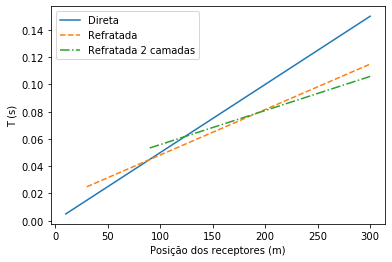

In [21]:
plt.plot(x,t_direta,label='Direta')
plt.plot(x[t_refratada_1_camada>0],t_refratada_1_camada[t_refratada_1_camada>0],label='Refratada',ls='--')
plt.plot(x[t_refratada_2_camadas>0],t_refratada_2_camadas[t_refratada_2_camadas>0],label='Refratada 2 camadas',ls='-.')
plt.xlabel('Posição dos receptores (m)')
plt.ylabel('T (s)')
plt.legend()

In [22]:
print('Tempo de trânsito refletor 7: %f segundos e refletor 15: %f segundos \n' %(t_refratada_2_camadas[14],t_refratada_2_camadas[19]))
print('Posição do receptor 7: %i metros e posição do receptor 15: %i metros' %(x[14],x[19]))

Tempo de trânsito refletor 7: 0.068367 segundos e refletor 15: 0.080867 segundos 

Posição do receptor 7: 150 metros e posição do receptor 15: 200 metros


In [23]:
alpha_refratada_2 = (t_refratada_2_camadas[19]-t_refratada_2_camadas[14])/(x[19]-x[14])
print(alpha_refratada_2)

0.00024999999999999995


In [24]:
1/alpha_refratada_2

4000.000000000001

### <center> Modelo de Camadas Inclinadas </center>

